## HYBRID IMAGES
### Primary Hybrid Image

In [2]:
# Install and Import needed libraries
!pip install numpy
!pip install matplotlib
!pip install opencv-python
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal, fftpack

# modify to where you store your project data including utils.py
datadir = "C:\\Users\\parke\\Documents\\CS445\\MP1\\Data\\" 

utilfn = datadir + "utils.py"
!copy "$utilfn" .
import utils


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\parke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


        1 file(s) copied.


### GOAL
Create a hybrid image, so that one image contains only high frequencies, and the other only low, so that when added together, you will see the high frequency image when they are available (larger image/closer viewing distance), and the low frequency image when those high frequencies are no longer available. (smaller image/further viewing distance).

To acheive this we will take the B&W images and pass them through either a low or high pass filter using a Gaussian filter and applying it in the frequency domain to only retain the type of frequencies we want for each image. These filters will be controlled/tuned by the choice of sigma value as it is what is used to build our Gaussian kernel.

In [3]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt

In [4]:
im1_file = datadir + 'IMG_7625.jpg'
im2_file = datadir + 'DSC_4457.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


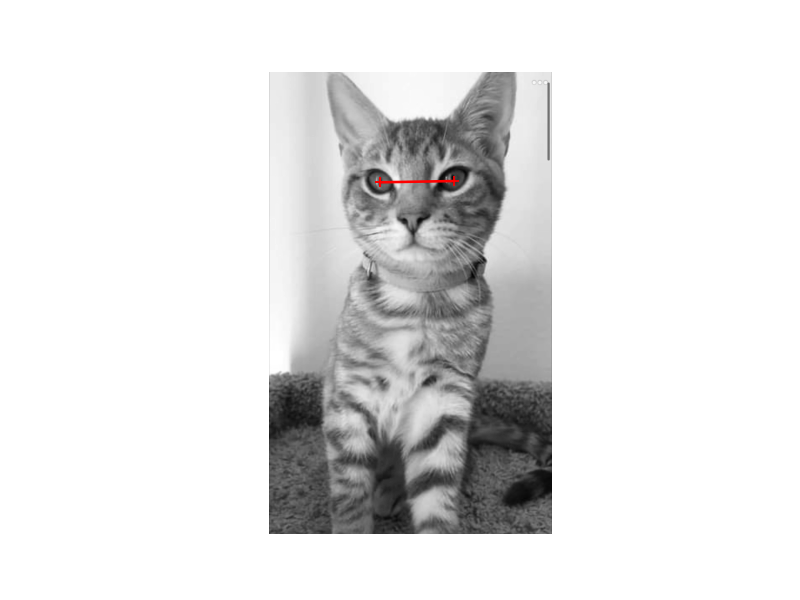

In [6]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


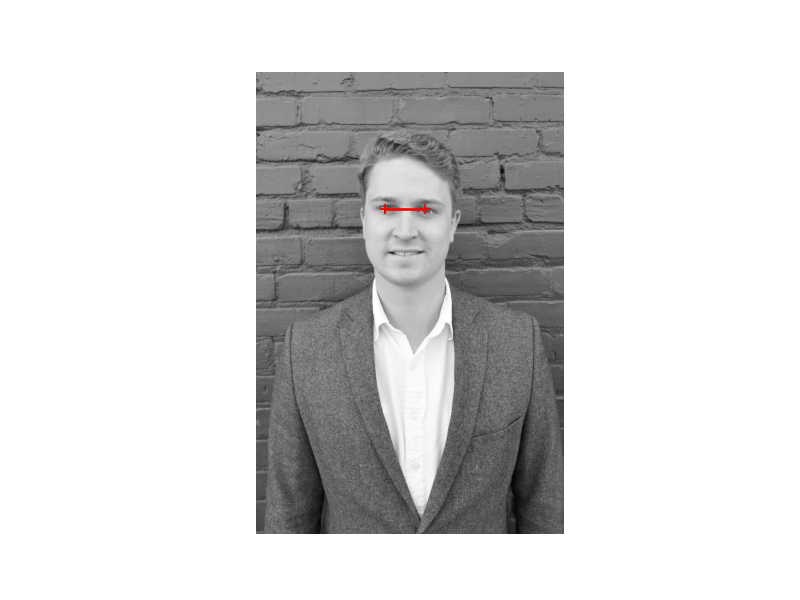

In [7]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [8]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [9]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


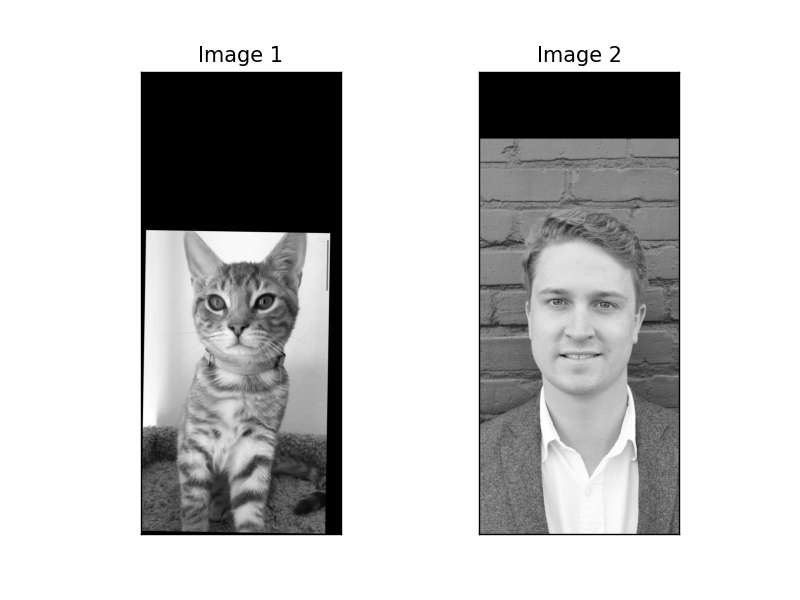

In [10]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [11]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    kernel_low = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    kernel_high = utils.gaussian_kernel(sigma_high, 3*sigma_high)
    
    img1 = signal.fftconvolve(im1, kernel_high, mode='same')
    img2 = im2 - signal.fftconvolve(im2, kernel_low, mode='same')
    
    fftsize = 1024
    
    #Images sanity check
    plt.figure()
    utils.plot(img1)
    plt.figure()
    im1_fft = np.fft.fftshift(np.fft.fft2(im1, (fftsize, fftsize)))
    plt.imshow(np.log(np.abs(im1_fft)))
    
    #Images sanity check
    plt.figure()
    utils.plot(img2)
    plt.figure()
    im2_fft = np.fft.fftshift(np.fft.fft2(im2, (fftsize, fftsize)))
    plt.imshow(np.log(np.abs(im2_fft)))
    
    return img1 + img2

<IPython.core.display.Javascript object>


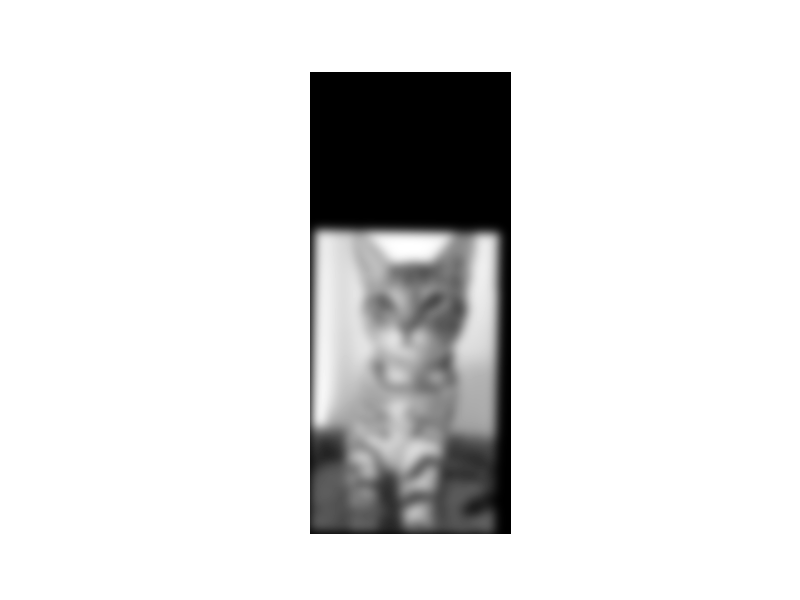

<IPython.core.display.Javascript object>


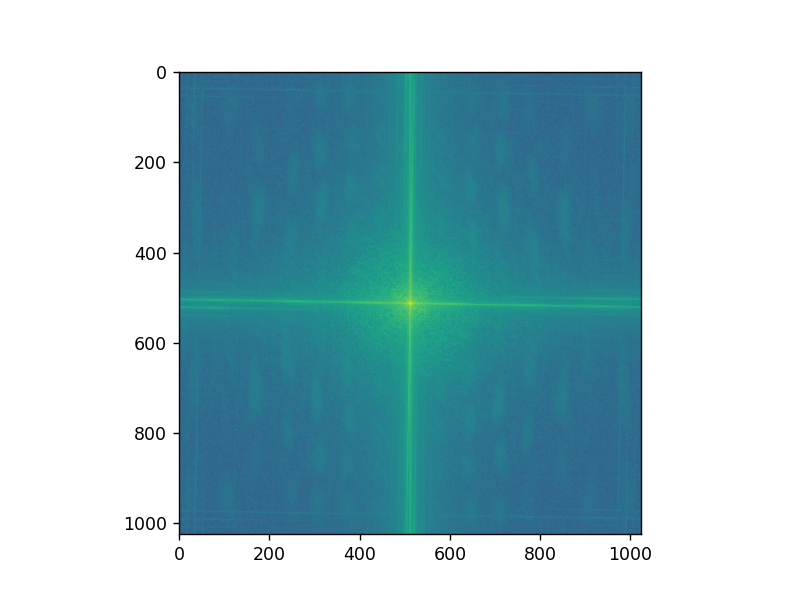

<IPython.core.display.Javascript object>


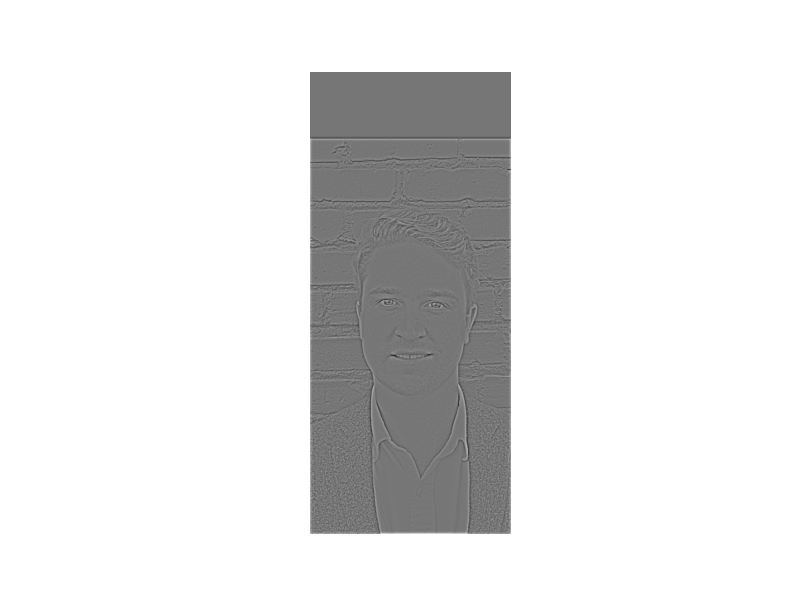

<IPython.core.display.Javascript object>


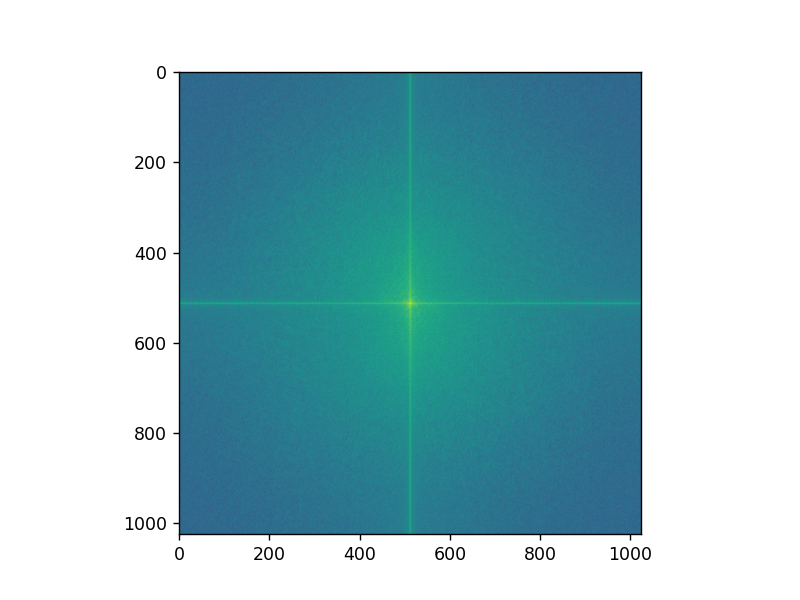

<IPython.core.display.Javascript object>


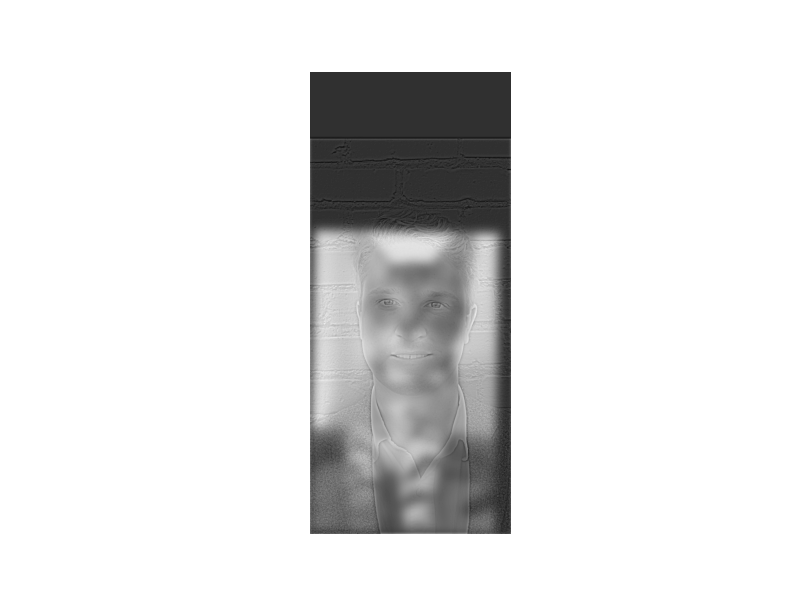

<IPython.core.display.Javascript object>


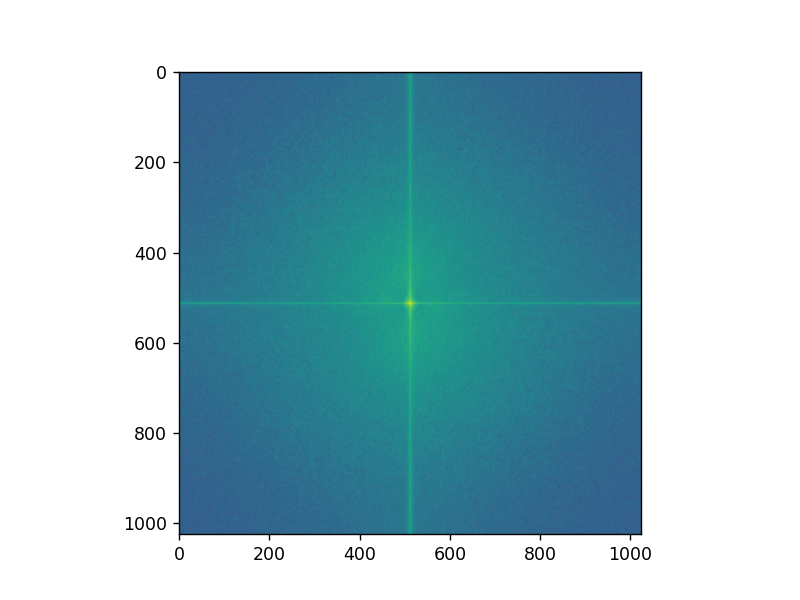

In [12]:
sigma_low = 5
sigma_high = 20

im_hybrid = hybridImage(im1, im2, sigma_low, sigma_high)

fftsize = 1024

#Images sanity check
plt.figure()
utils.plot(im_hybrid)
plt.figure()
imh_fft = np.fft.fftshift(np.fft.fft2(im_hybrid, (fftsize, fftsize)))
plt.imshow(np.log(np.abs(imh_fft)))

### ADDITIONAL HYBRID IMAGES

In [13]:
im3_file = datadir + 'IMG_2770.jpg'
im4_file = datadir + 'IMG_7437.jpg'
im5_file = datadir + '222.PNG'
im6_file = datadir + 'DSC_4457.jpg'

im3 = np.float32(cv2.imread(im3_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im4 = np.float32(cv2.imread(im4_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im5 = np.float32(cv2.imread(im5_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im6 = np.float32(cv2.imread(im6_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


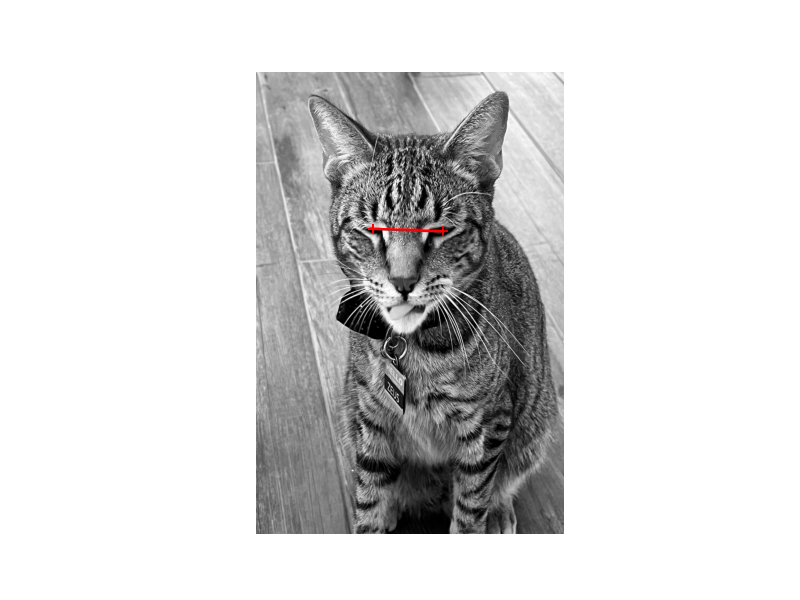

In [15]:
pts_im3 = utils.prompt_eye_selection(im3)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


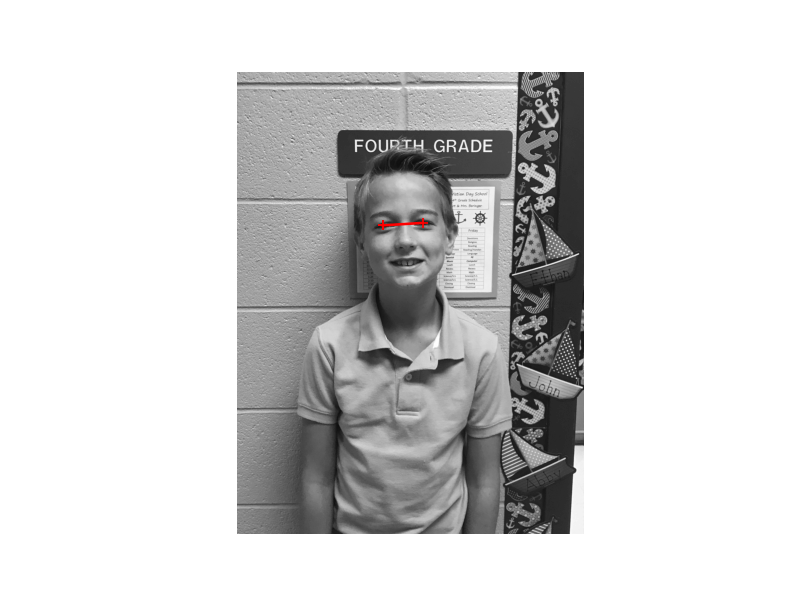

In [17]:
pts_im4 = utils.prompt_eye_selection(im4)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


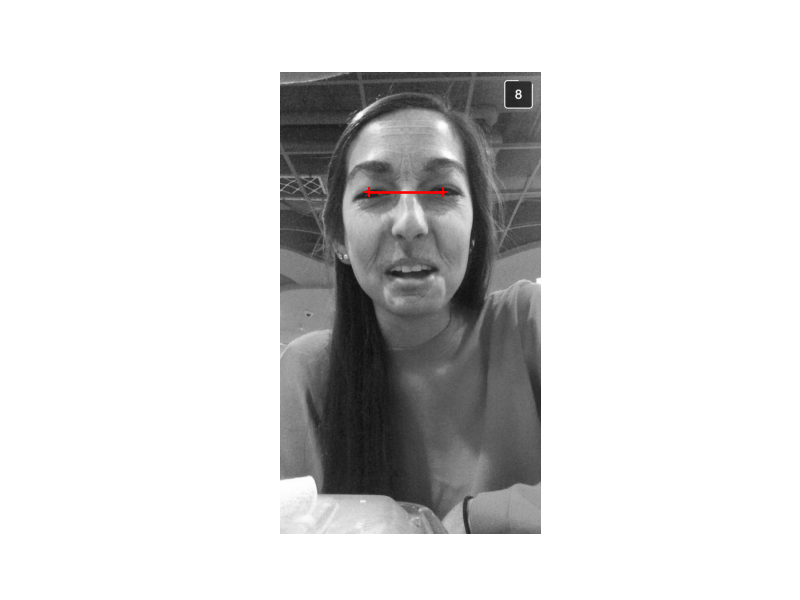

In [18]:
pts_im5 = utils.prompt_eye_selection(im5)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


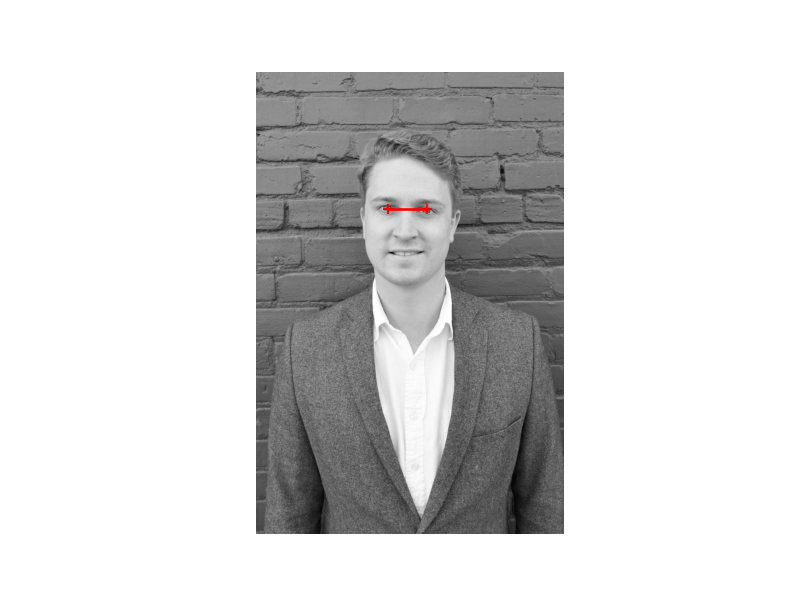

In [19]:
pts_im6 = utils.prompt_eye_selection(im6)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

In [20]:
im3, im4 = utils.align_images(im3_file, im4_file,pts_im3,pts_im4,save_images=False)
im5, im6 = utils.align_images(im5_file, im6_file,pts_im5,pts_im6,save_images=False)

In [21]:
# convert to grayscale
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY) / 255.0
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2GRAY) / 255.0
# convert to grayscale
im5 = cv2.cvtColor(im5, cv2.COLOR_BGR2GRAY) / 255.0
im6 = cv2.cvtColor(im6, cv2.COLOR_BGR2GRAY) / 255.0

In [22]:
def hybridImageAdditional(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    kernel_low = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    kernel_high = utils.gaussian_kernel(sigma_high, 3*sigma_high)
    
    img1 = signal.fftconvolve(im1, kernel_high, mode='same')
    img2 = im2 - signal.fftconvolve(im2, kernel_low, mode='same')
    
    fftsize = 1024
    
    #Images sanity check
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(im1,cmap='gray')
    axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(im2,cmap='gray')
    axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);
    
    return img1 + img2

<IPython.core.display.Javascript object>


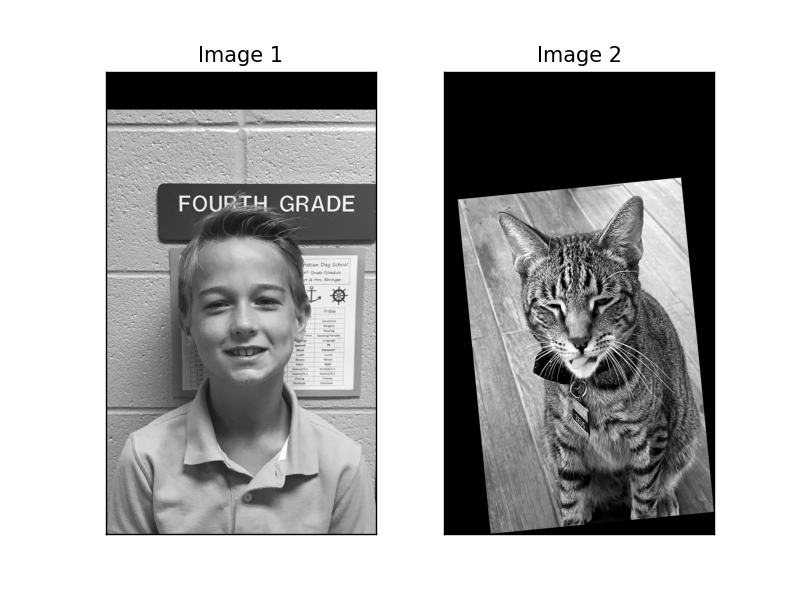

<IPython.core.display.Javascript object>


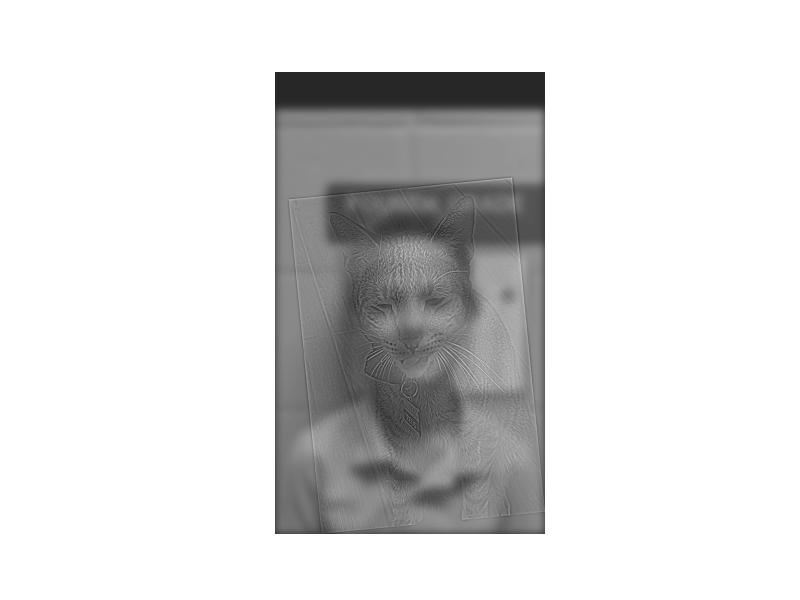

<IPython.core.display.Javascript object>


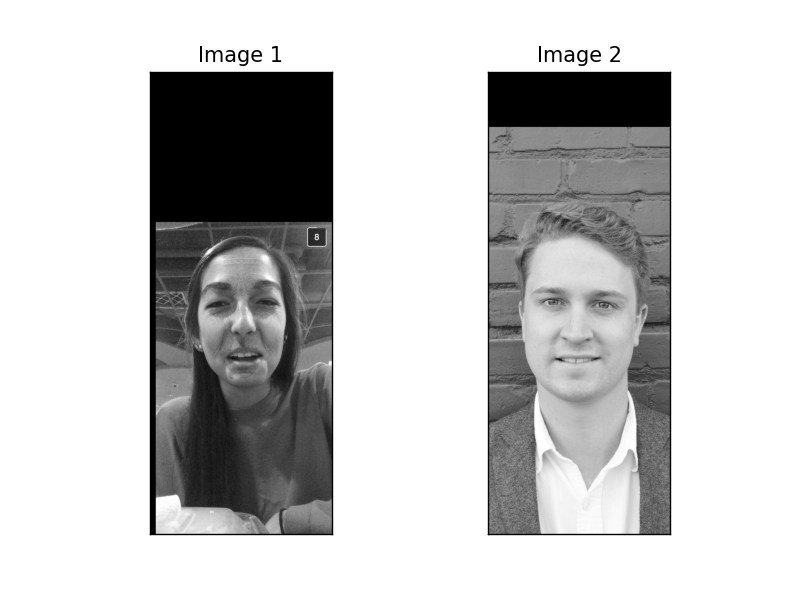

<IPython.core.display.Javascript object>


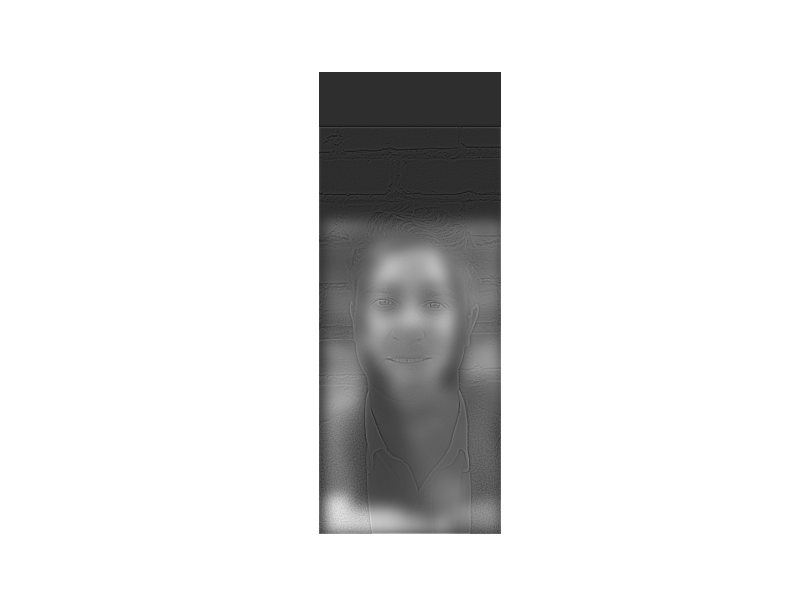

In [23]:
sigma_low_34 = 5
sigma_high_34 = 22
sigma_low_56 = 3
sigma_high_56 = 24

im_hybrid1 = hybridImageAdditional(im4, im3, sigma_low_34, sigma_high_34)
#Images sanity check
plt.figure()
utils.plot(im_hybrid1)

im_hybrid2 = hybridImageAdditional(im5, im6, sigma_low_56, sigma_high_56)
#Images sanity check
plt.figure()
utils.plot(im_hybrid2)

## Image Enhancement

## Contrast Enhancement
For the contrast enhancement, we first color balance the image by taking the mean color of the image, then get the modifying alpha channels by dividing the mean of the image by the mean of each channel as described in lecture 3.2.2 in Color balancing via linear adjustment. When then apply the modified alpha channels to the original channels to get a more balanced image using a "Gray world" assumption. To continue we then adjust the gamma of the image to increase the brightness by increasing the insensity of the image.

I also increased contrast by using histogram equalization by converting to HSV and equalizing the histogram based on the Hue (h channel). This image itself is a little strong so we blend it with the original image to make the image more "realistic".

My preference is the color balanced with gamma adjustment image. I feel that the histogram equalization image while increasing contrast changes some of the colors that make the image seem more natural.

## Color Enhancement
For this we want to make the colors brighter/vivid without making the image itself lighter. We start by converting the image to the HSV colorspace and manipulate the Saturation (s channel) to increase the vividness/vibrancy of the colors in the image. We cannot use a constant scalar for this since we need to ensure our values stay mapped between 0 and 255. In order to manipulate the saturation with preserving the 0 - 255 mapping, I chose to scale by changing the mapping to 0 - 1, then taking the square root of those values to increase the saturtion, before mapping it back to 0 - 255.

## Color Shift
Using the L*a*b color space we can adjust the colors by adjusting the a and b channel values. In order to increase the red in the image (and thus decreasing the green) we can increase the value of the a channel. Likewise, to reduce the yellow (and in turn increase the blue) we can decrease the value of the b channel. These will not change the luminance of the image as these channels are purely chromiance.

<IPython.core.display.Javascript object>


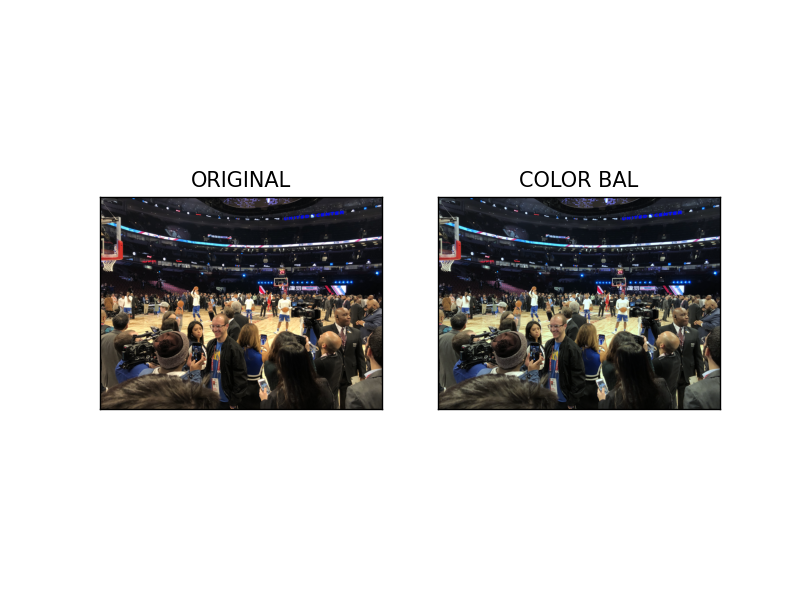

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<IPython.core.display.Javascript object>


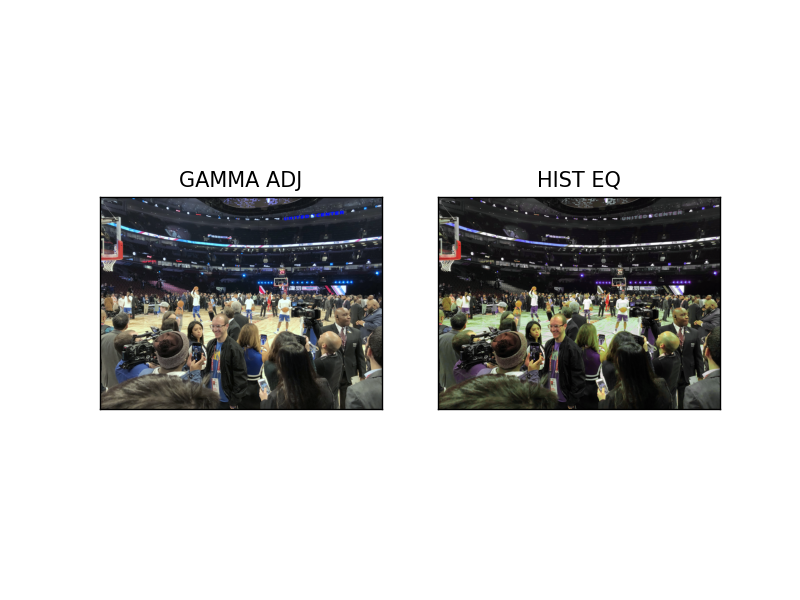

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<IPython.core.display.Javascript object>


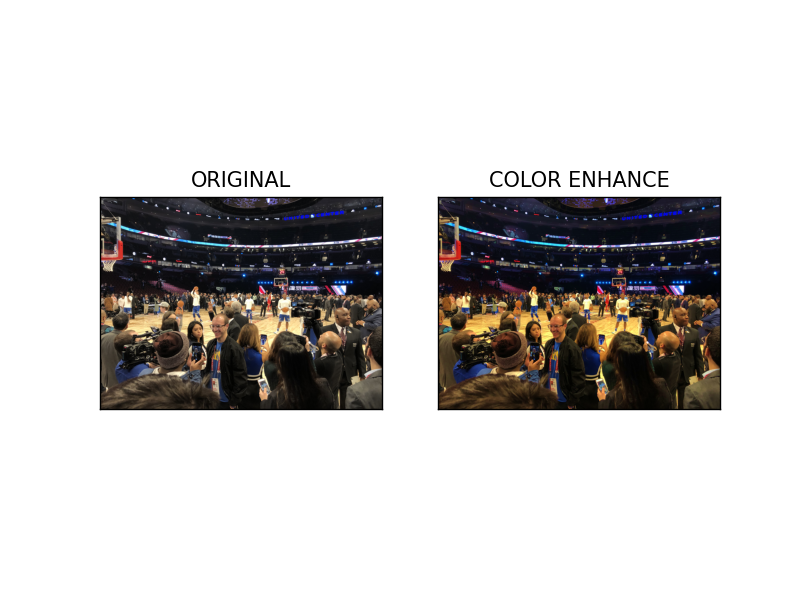

<IPython.core.display.Javascript object>


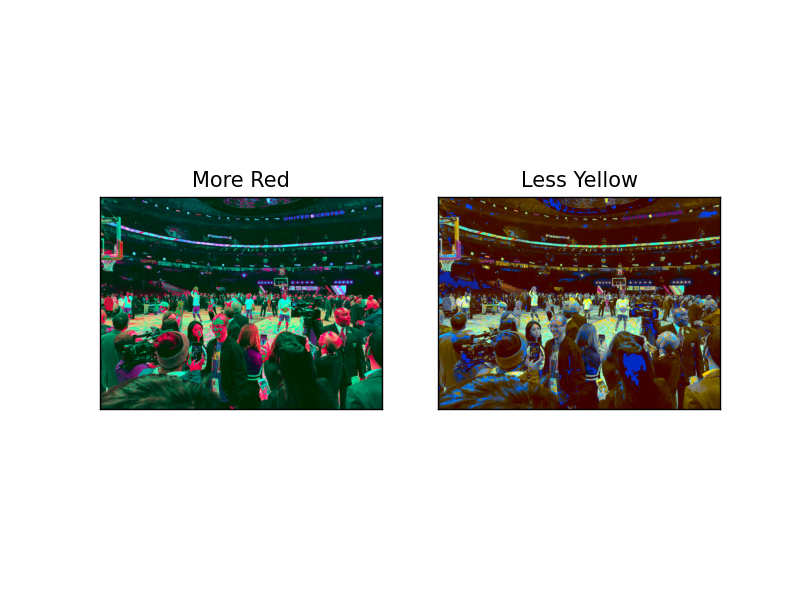

In [26]:
im_enhance_file = datadir + "166.JPG"
im_enhance = cv2.imread(im_enhance_file)
im_enhance_rgb = cv2.cvtColor(im_enhance, cv2.COLOR_BGR2RGB)

# Contrast Enhancement
r,b,g = cv2.split(im_enhance_rgb)
# COLOR BALANCING
mv = np.mean(im_enhance_rgb)
ar = np.divide(mv, np.mean(r))
ab = np.divide(mv, np.mean(b))
ag = np.divide(mv, np.mean(g))
im_contrast_enhanced = cv2.merge([(r * ar), (b * ab), (g * ag)])/255
# GAMMA ADJUSTMENT
im_gamma_adj = im_contrast_enhanced ** .8
# HISTOGRAM EQUALIZATION
im_hsv = cv2.cvtColor(im_enhance_rgb, cv2.COLOR_RGB2HSV)
im_hsv[:,:,0] = cv2.equalizeHist(im_hsv[:,:,0])
im_hist_eq_rgb = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB)
im_blend = cv2.addWeighted(im_enhance_rgb, .5, im_hist_eq_rgb, .5, 0.0)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(im_enhance_rgb,cmap='gray')
axes[0].set_title('ORIGINAL'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im_contrast_enhanced,cmap='gray')
axes[1].set_title('COLOR BAL'), axes[1].set_xticks([]), axes[1].set_yticks([]);
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im_gamma_adj,cmap='gray')
axes[0].set_title('GAMMA ADJ'), axes[0].set_xticks([]), axes[0].set_yticks([]);
axes[1].imshow(im_blend,cmap='gray')
axes[1].set_title('HIST EQ'), axes[1].set_xticks([]), axes[1].set_yticks([]);

# Color Enhancement
im_color_enhance_hsv = cv2.cvtColor(im_enhance, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(im_color_enhance_hsv)
s2 = s/255
s2 = np.sqrt(s2) * 255
s2 = s2.astype(np.uint8)
im_color_enhanced = cv2.merge([h, s2, v])
im_color_enhanced_rgb = cv2.cvtColor(im_color_enhanced, cv2.COLOR_HSV2RGB)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(im_enhance_rgb,cmap='gray')
axes[0].set_title('ORIGINAL'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im_color_enhanced_rgb,cmap='gray')
axes[1].set_title('COLOR ENHANCE'), axes[1].set_xticks([]), axes[1].set_yticks([]);

# Color Shift
im_color_shift_Lab = cv2.cvtColor(im_enhance, cv2.COLOR_BGR2Lab)
L,a,b = cv2.split(im_color_shift_Lab)
a2 = a/255
a2 = np.sqrt(a) * 255
b2 = b/255
b2 = (b**2)*255
a2 = a2.astype(np.uint8)
b2 = b2.astype(np.uint8)
im_color_shifted_red = cv2.merge([L, a2, b])
im_color_shifted_no_yellow = cv2.merge([L, a, b2])
im_color_shifted_red_rgb = cv2.cvtColor(im_color_shifted_red, cv2.COLOR_Lab2RGB)
im_color_shifted_no_yellow_rgb = cv2.cvtColor(im_color_shifted_no_yellow, cv2.COLOR_Lab2RGB)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im_color_shifted_red_rgb,cmap='gray')
axes[0].set_title('More Red'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im_color_shifted_no_yellow_rgb,cmap='gray')
axes[1].set_title('Less Yellow'), axes[1].set_xticks([]), axes[1].set_yticks([]);